In [1]:
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mopet

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

!rm exploration.h5

def evalFunction(params):
    result_float = abs((params["x"] ** 2 + params["y"] ** 2) - 1)
    result_array = np.random.randn(np.random.randint(1, 131), np.random.randint(1, 5000))
    result = {}
    result["float_result"] = result_float
    result["array_result"] = result_array
    return result

params = {"x": 1.3, "y": 2.7, "z": 0.0}
explore_params = {"x": np.linspace(-2, 2, 21), "y": np.linspace(-2, 2, 21)}
    
ex = mopet.Exploration(evalFunction, params, explore_params)

In [3]:
ex.run()

2020-03-13 01:44:42,943	WARNING worker.py:682 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2020-03-13 01:44:42,986	INFO resource_spec.py:212 -- Starting Ray with 4.93 GiB memory available for workers and up to 2.48 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-13 01:44:43,353	WARNING services.py:1080 -- Failed to start the dashboard. The dashboard requires Python 3 as well as 'pip install aiohttp psutil setproctitle grpcio'.
INFO:root:Runs took 3.204366683959961 s to submit.
INFO:root:Runs and storage took 1.4275758266448975 s to complete.


In [4]:
ex.load_results()

INFO:root:exploration.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exploration_2020_03_13_01H_44M_42S``
INFO:root:441 results loaded.
INFO:root:Creating new results DataFrame
INFO:root:exploration.h5 closed.


In [5]:
ex.results

{0: {'array_result': array([[-1.95162512, -0.09365977, -0.98323277, ..., -0.90529955,
          -0.06052831,  0.72307712],
         [-0.16148664, -0.69490966, -1.83416727, ...,  0.74225354,
           0.59689591, -0.93361492],
         [ 0.36957174,  0.65678851,  1.10402895, ..., -0.16150951,
           1.2467775 , -0.68965521],
         ...,
         [ 1.0395991 ,  0.44347549,  1.4818299 , ...,  1.51963624,
           0.24370895, -0.95551825],
         [-0.22551247,  0.92622558, -0.41947058, ..., -0.75396682,
          -0.56405665,  0.98626185],
         [ 0.36057588, -1.09207861,  1.31426438, ...,  1.36059967,
           0.61667096, -1.12865828]]), 'float_result': 7.0},
 1: {'array_result': array([[ 0.3172034 , -1.66107324, -0.49060962, ...,  0.03985413,
           1.96596853, -1.28334378],
         [ 1.73996387, -1.95115253,  0.00883705, ..., -0.38412905,
          -1.21148468,  1.18994591],
         [ 0.28661558,  1.14827963, -0.17045304, ..., -0.78583105,
           1.23828194, -1

In [6]:
ex.df["result"] = None
for r in ex.df.index:
    ex.df.loc[r, "result"] = ex.results[r]['float_result']

In [7]:
ex.df

,x,y,result
0,-2,-2,7
1,-2,-1.8,6.24
10,-2,0,3
100,-1.2,1.2,1.88
101,-1.2,1.4,2.4
...,...,...,...
95,-1.2,0.2,0.48
96,-1.2,0.4,0.6
97,-1.2,0.6,0.8
98,-1.2,0.8,1.08


In [8]:
pivoted = ex.df.pivot_table(values='result', index = 'x', columns='y', aggfunc='first')

Text(0, 0.5, 'y')

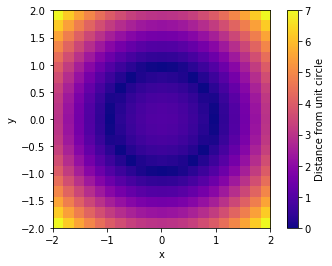

In [9]:
plt.imshow(pivoted, \
           extent = [min(ex.df.x), max(ex.df.x),
                     min(ex.df.y), max(ex.df.y)], origin='lower')
plt.colorbar(label='Distance from unit circle')
plt.xlabel("x")
plt.ylabel("y")